# Home Loan Approval Project

## Objective :
* The aim of this project is to determine, given a set of parameters, whether a canditate is suitable to recieve a home loan on a given property.
* For this project, the dataset is provided by Kaggle. The link for the same is : https://www.kaggle.com/datasets/sazid28/home-loan.
* Thus, for this project, we consider the 'Target' to be predicted as the 'Loan Status' feature, that indicates whether a given canditate is dispensed the loan.
* The flow of the project is as follows : 
    * Perform exploratory data analysis on the data. This includes : 
        * Inspection of the data
        * Performing univariate and bivariate analysis
        * Visualizing the relationships between features
    * Data cleaning and preparation
        * Cleaning the data of any anomalies
        * Preparing the data for further steps
    * Using Feature Engineering to :
        * Analyse and choose informative features
        * Creating new features that might have stronger relationship
        * Preparing the data for the ML model
    * Using Machine Learning to : 
        * Determine the most optimal model for the task
        * Use the said model to predict the outcome.

References : https://www.kaggle.com/code/sazid28/home-loan-prediction/notebook

### The dataset for the given problem is divided into two parts :
* Train
* Test

We will be using the 'Train' data to train the model and 'Test' data to predict the outcome status of the Loan approval

In [243]:
#We first import the necessary libraries for the tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
#Reading the csv file and copying the data o that the original files remain unaltered
train = pd.read_csv('home-loan/train.csv').copy()
test = pd.read_csv('home-loan/test.csv').copy()

In [245]:
#We first inspect the data
df = pd.DataFrame(train)
print("The structure of the data frame : ", df.shape)
df.head()

The structure of the data frame :  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


Thus we can conclude that our data has 13 columns and has 614 entries(rows)

In [246]:
#We can also get the statistical information regarding the dataframe and informatino about its columns
print("\nStatistical features of the data ",df.describe())
#We can also have information on its columns
print("\n")
print(df.info())


Statistical features of the data         ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count           614.00             614.00      592.00            600.00   
mean           5403.46            1621.25      146.41            342.00   
std            6109.04            2926.25       85.59             65.12   
min             150.00               0.00        9.00             12.00   
25%            2877.50               0.00      100.00            360.00   
50%            3812.50            1188.50      128.00            360.00   
75%            5795.00            2297.25      168.00            360.00   
max           81000.00           41667.00      700.00            480.00   

       Credit_History  
count          564.00  
mean             0.84  
std              0.36  
min              0.00  
25%              1.00  
50%              1.00  
75%              1.00  
max              1.00  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613

## Univariate Analysis : Categorical variables

As a part of univariate analysis, we analyse each column individually and its statistical properties

### Univariate analysis of feature : 'Gender' 

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
The percentage of men versus females applying for a home loan are : 
 Male     81.36
Female   18.64
Name: Gender, dtype: float64


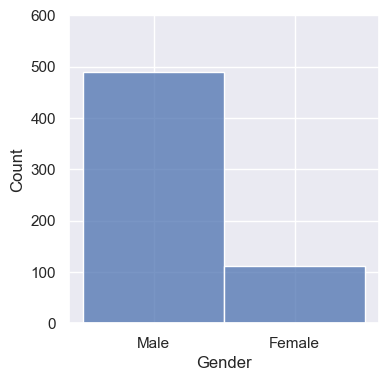

In [247]:
#Analysing gender
plt.figure(figsize=(4,4))
sns.histplot(data=df['Gender'])
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Gender.describe())
print("The percentage of men versus females applying for a home loan are : \n", df['Gender'].value_counts(normalize=True)*100)
plt.show()

### Univariate analysis of feature : 'Marriage Status' 

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

The percentage of married versus unmarried people applying for a home loan are :
 Yes   65.14
No    34.86
Name: Married, dtype: float64


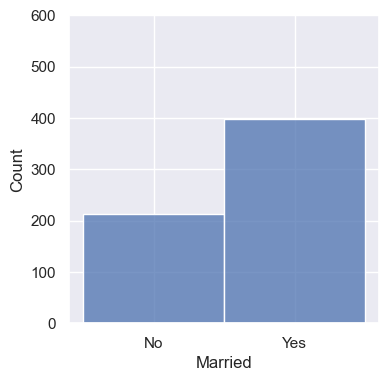

In [248]:
#Analysing Marriage status 
plt.figure(figsize=(4,4))
sns.histplot(data = df, x = 'Married')
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Married.describe())
print('\nThe percentage of married versus unmarried people applying for a home loan are :\n', df.Married.value_counts(normalize = True)*100)
plt.show()

### Univariate analysis of feature : 'Dependents' 

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

The percentage of married versus unmarried people applying for a home loan are :
 0    57.60
1    17.03
2    16.86
3+    8.51
Name: Dependents, dtype: float64


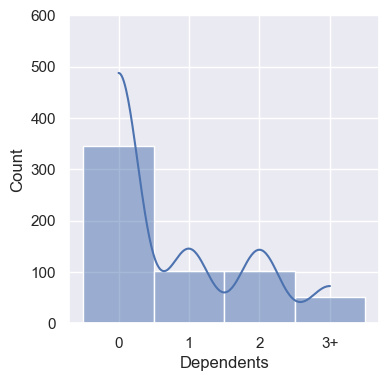

In [249]:
#Analysing the 'Dependent' column
plt.figure(figsize=(4,4))
sns.histplot(data = df, x = 'Dependents', kde=True)
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Dependents.describe())
print('\nThe percentage of married versus unmarried people applying for a home loan are :\n', df.Dependents.value_counts(normalize = True)*100)
plt.show()

### Univariate analysis of feature : 'Educational Qualification' 

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


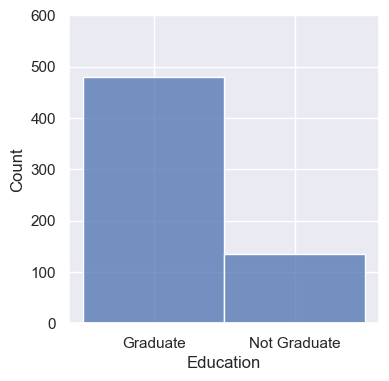

In [250]:
#Analysing Educational qualification
plt.figure(figsize=(4,4))
sns.histplot(data = df, x = 'Education')
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Education.describe())
print(df.Education.value_counts())
plt.show()

### Univariate Analysis of Feature : Employ category

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
No     500
Yes     82
Name: Self_Employed, dtype: int64


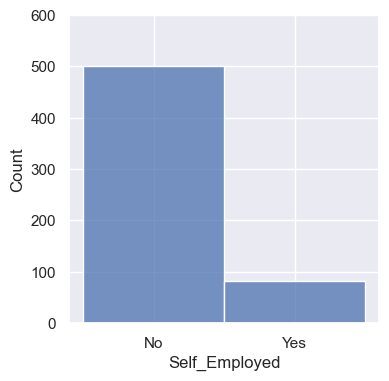

In [251]:
#Analysing the 'Self-Employed' feature
plt.figure(figsize=(4,4))
sns.histplot(data = df['Self_Employed'])
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Self_Employed.describe())
print(df.Self_Employed.value_counts())
plt.show()

### Univariate analysis of feature : 'Property Area' 

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


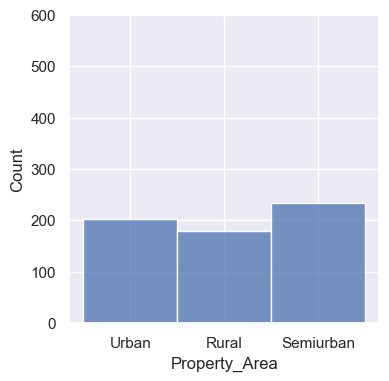

In [252]:
#Analysing property area type
plt.figure(figsize=(4,4))
sns.histplot(data = df['Property_Area'])
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Property_Area.describe())
print(df.Property_Area.value_counts())
plt.show()

### Univariate analysis of feature : Credit History

count   564.00
mean      0.84
std       0.36
min       0.00
25%       1.00
50%       1.00
75%       1.00
max       1.00
Name: Credit_History, dtype: float64
1.00    475
0.00     89
Name: Credit_History, dtype: int64


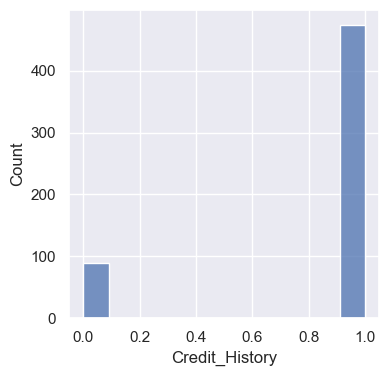

In [253]:
#Analysis of feature 'Credit History'
plt.figure(figsize=(4,4))
sns.histplot(data = df['Credit_History'], kde=False)
print(df.Credit_History.describe())
print(df.Credit_History.value_counts())
#I have a suspicion of some outliers
plt.show()

## Insights : 
* It indicates that far more number of males apply for a home loan that females
* Married people are almost twice as more likely to apply for a home loan than unmarried folks.
* The above analysis shows that people with surplus cash are able to invest it in real estate. Here we can formulate a hypothesis that people with more income tend to have the fiscal ability to buy homes. We will resolve this hypothesis in the coming cells.
* This confirms that a lot more number of graduates are applying for loans. This might be because graduates are more likely to secure a regular income source.
* This confirms our insight from the education feature analysis that people with steady, regular income tend to be able to invest in real estate
* The above analysis shows that property area : Rural, Urban or Semi-Urban have no effect on Loan approval
* People with good credit histroy are more likely to recieve a home loan. This goes to show fiscal literacy and maybe surplus money. This can validate the theory of surplus money allowing investment in real estate and thereby home loan approval.
* No spelling errors

## Univariate Analysis : Continous features
As a part of univariate analysis, we analyse each column individually with its statistical properties

### Univariate analysis of feature : Applicant Income

count     614.00
mean     5403.46
std      6109.04
min       150.00
25%      2877.50
50%      3812.50
75%      5795.00
max     81000.00
Name: ApplicantIncome, dtype: float64


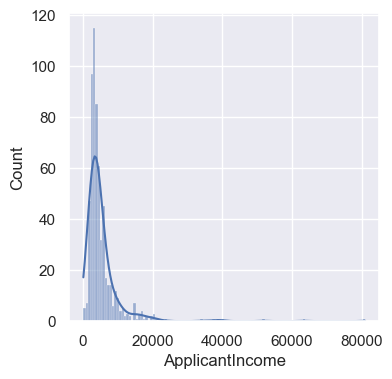

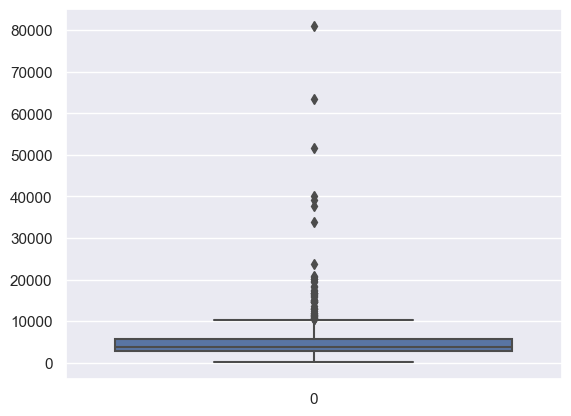

In [254]:
#Analysis of feature 'Applicant Income'
plt.figure(figsize=(4,4))
sns.histplot(data = df['ApplicantIncome'], kde=True)
print(df.ApplicantIncome.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['ApplicantIncome'])
plt.show()


### Univariate analysis of feature : CoApplicant Income

count     614.00
mean     1621.25
std      2926.25
min         0.00
25%         0.00
50%      1188.50
75%      2297.25
max     41667.00
Name: CoapplicantIncome, dtype: float64


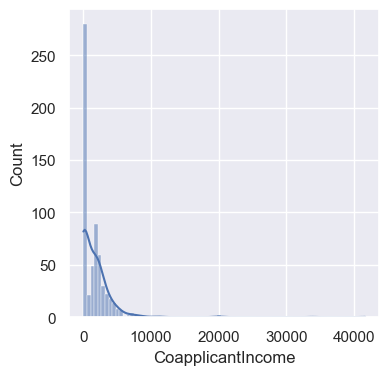

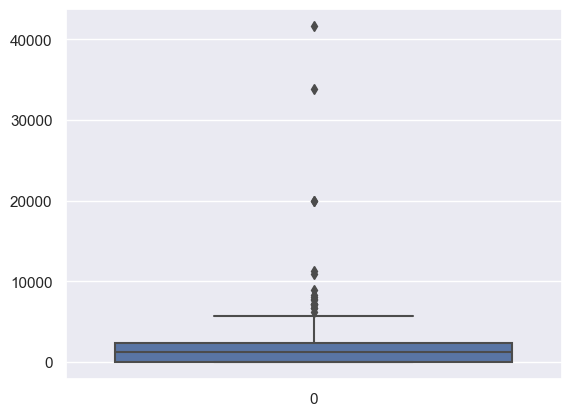

In [255]:
#Analysis of feature 'Applicant Income'
plt.figure(figsize=(4,4))
sns.histplot(data = df['CoapplicantIncome'], kde=True)
print(df.CoapplicantIncome.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['CoapplicantIncome'])
plt.show()

No significant insights gained

### Univariate analysis of feature : Loan Amount

count   592.00
mean    146.41
std      85.59
min       9.00
25%     100.00
50%     128.00
75%     168.00
max     700.00
Name: LoanAmount, dtype: float64


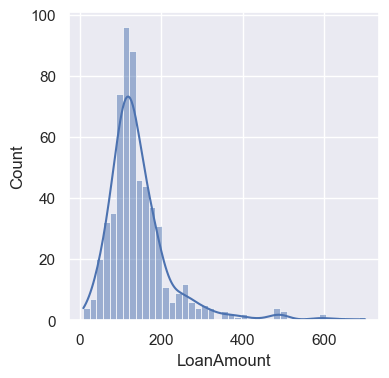

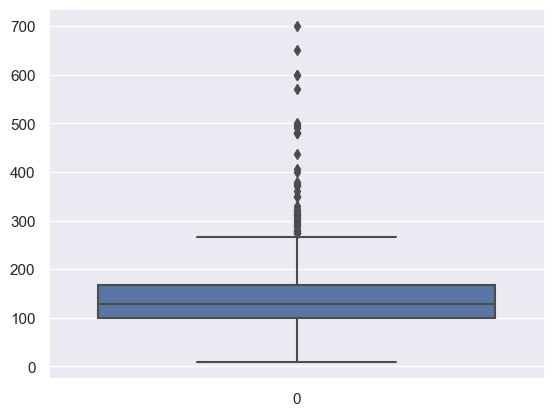

In [256]:
#Analysis of Loan Amount
plt.figure(figsize=(4,4))
sns.histplot(data = df['LoanAmount'], kde=True)
print(df.LoanAmount.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['LoanAmount'])
plt.show()

### Univariate analysis of feature : Loan Term

count   600.00
mean    342.00
std      65.12
min      12.00
25%     360.00
50%     360.00
75%     360.00
max     480.00
Name: Loan_Amount_Term, dtype: float64


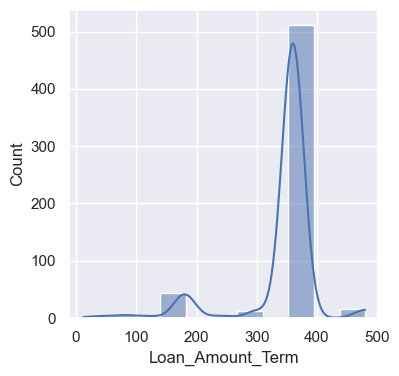

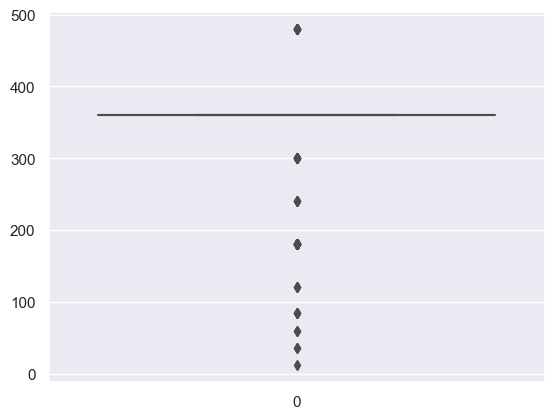

In [257]:
#Analysis of feature 'Loan Term'
plt.figure(figsize=(4,4))
sns.histplot(data = df['Loan_Amount_Term'], kde=True)
print(df.Loan_Amount_Term.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['Loan_Amount_Term'])
plt.show()

### All the visualizations at a glance

<Figure size 400x400 with 0 Axes>

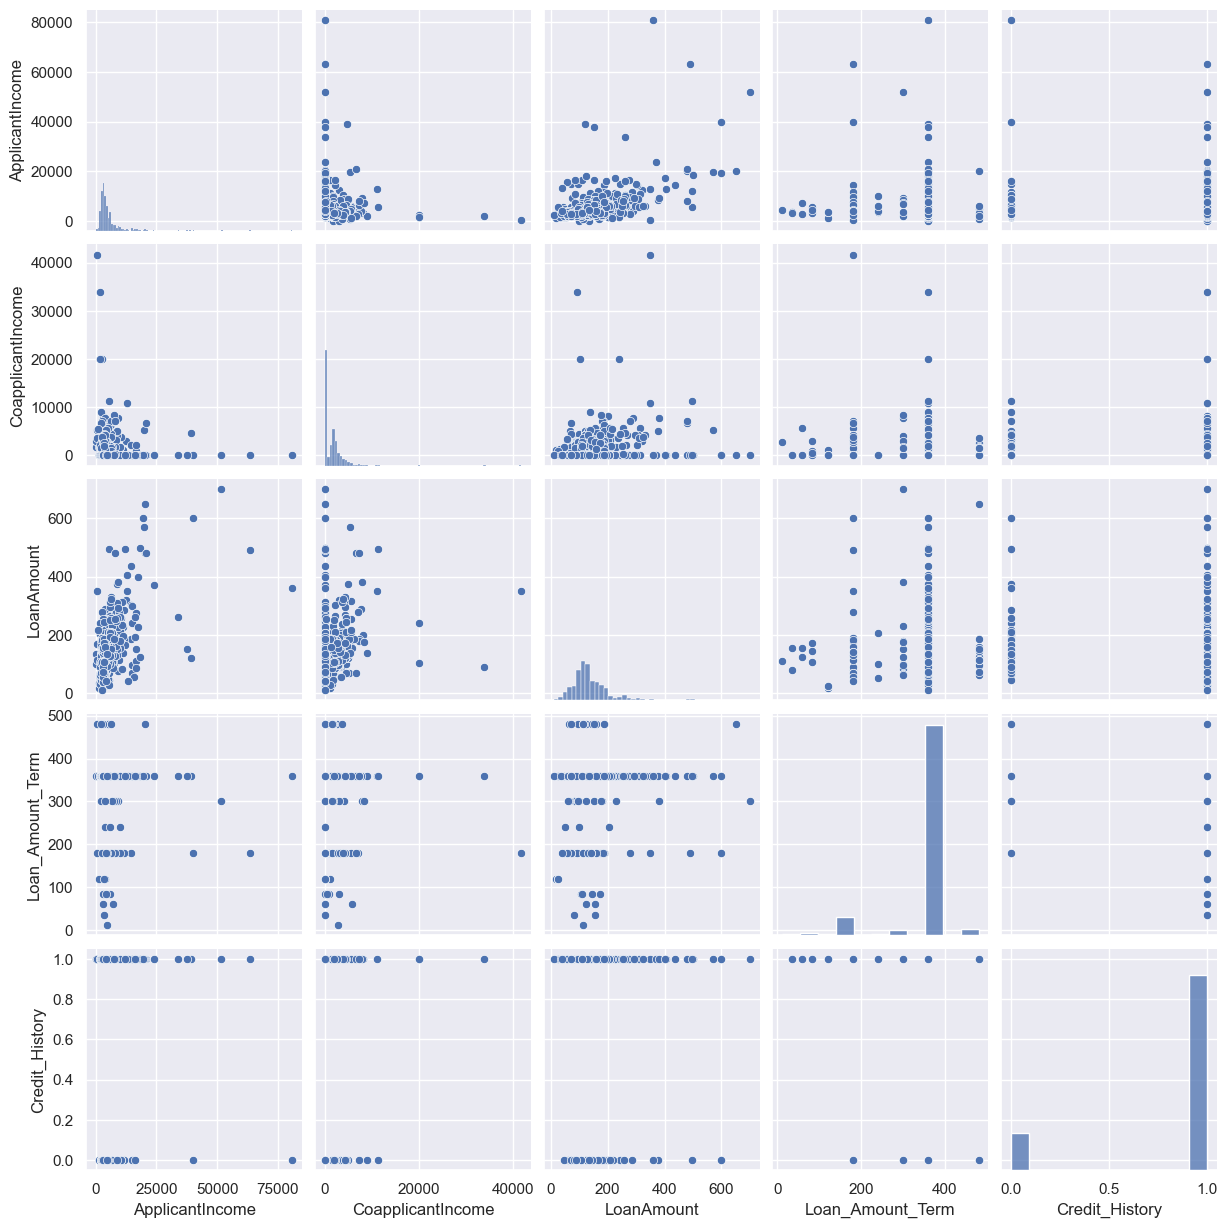

In [258]:
plt.figure(figsize=(4,4))
sns.pairplot(df)
plt.show()

## Insights : 
* The applicant income and loan amount is right-skewed, we need to normalize it so that the ML model works well
* We need to deal with outliers, which will be done in the data processing step
* The most common loan duration is of 360 days -> 1 year

## Bivariate Analysis : 
As a part of Bivariate Analysis, we analyse the relationship between two features/variables

### Mutual Information table and Correlation Heatmap

C:\Users\Acer\AppData\Local\Temp\ipykernel_5844\2225912047.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


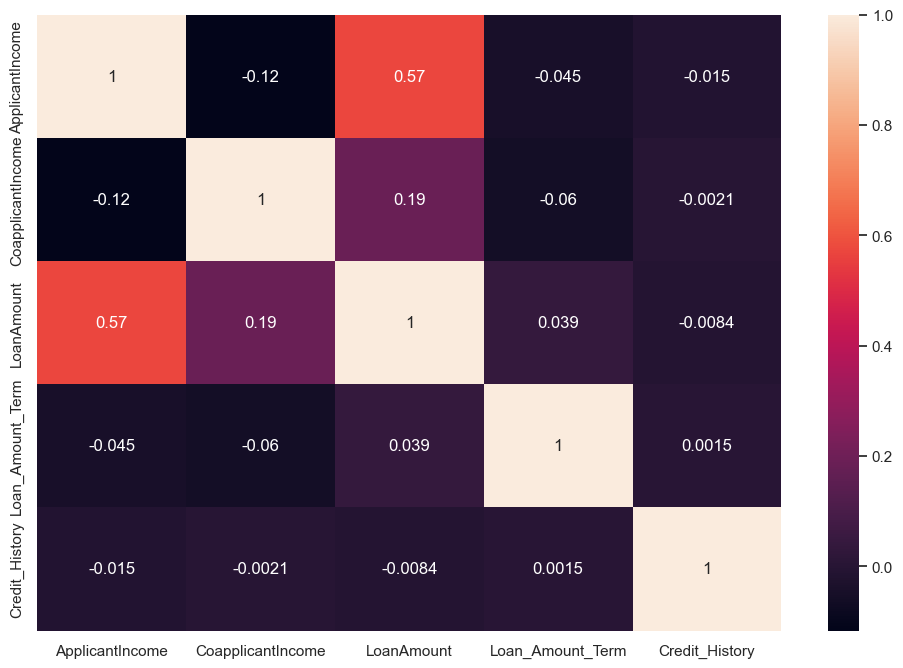

In [259]:
#We will find the values for Mutual Information later
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

The above heatmap shows some very interesting relations. We will analyse these relations further.

### Bivariate Analysis of : Loan Amout Term and Credit History

<Figure size 400x400 with 0 Axes>

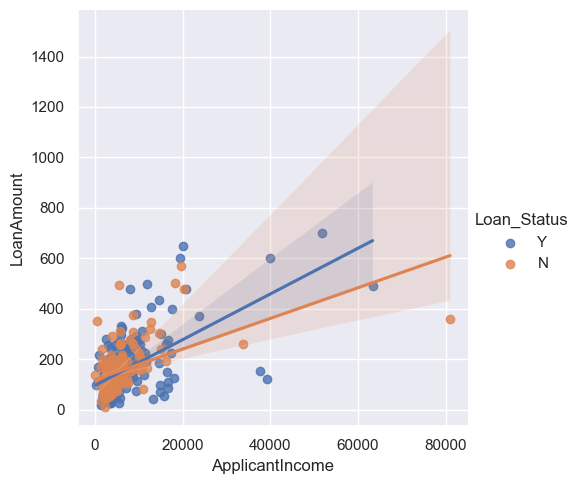

In [260]:
#Bivariate analysis of loan amount and applicant income
plt.figure(figsize=(4,4))
sns.lmplot(data=df, x='ApplicantIncome', y='LoanAmount', hue = 'Loan_Status')
plt.show()

### Bivariate Analysis : Co-Applicant Income and Loan Amount

<Figure size 400x400 with 0 Axes>

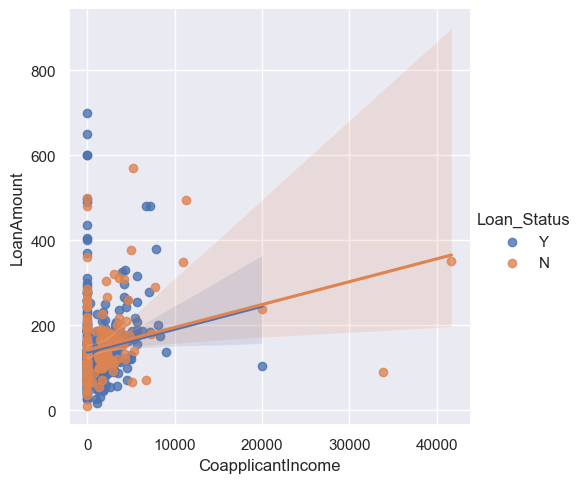

The description of Applicant Income feature : 
 count     614.00
mean     5403.46
std      6109.04
min       150.00
25%      2877.50
50%      3812.50
75%      5795.00
max     81000.00
Name: ApplicantIncome, dtype: float64
The description of Co-Applicant Income feature : 
 count     614.00
mean     1621.25
std      2926.25
min         0.00
25%         0.00
50%      1188.50
75%      2297.25
max     41667.00
Name: CoapplicantIncome, dtype: float64


In [261]:
#Bivariate analysis of loan amount and applicant income
plt.figure(figsize=(4,4))
sns.lmplot(data=df, x='CoapplicantIncome', y='LoanAmount', hue = 'Loan_Status')
plt.show()
print("The description of Applicant Income feature : \n",df['ApplicantIncome'].describe())
print("The description of Co-Applicant Income feature : \n", df['CoapplicantIncome'].describe())

### Bivariate Analysis : Loan Amount and Loan Amount Term

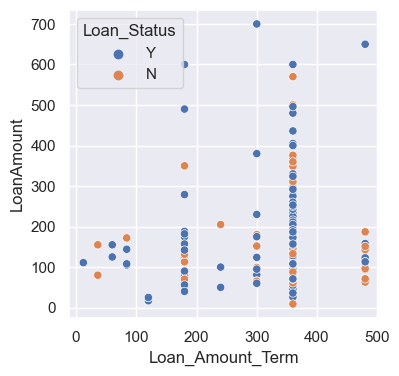

The description of Loan Amount feature : 
 count   592.00
mean    146.41
std      85.59
min       9.00
25%     100.00
50%     128.00
75%     168.00
max     700.00
Name: LoanAmount, dtype: float64
The description of Loan Amount Term feature : 
 count   600.00
mean    342.00
std      65.12
min      12.00
25%     360.00
50%     360.00
75%     360.00
max     480.00
Name: Loan_Amount_Term, dtype: float64


In [262]:
#Bivariate analysis of Loan Amount and Loan Amount Term
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, x='Loan_Amount_Term', y='LoanAmount', hue = 'Loan_Status')
plt.show()
print("The description of Loan Amount feature : \n",df['LoanAmount'].describe())
print("The description of Loan Amount Term feature : \n", df['Loan_Amount_Term'].describe())

### Bivariate Analysis : Loan Amount Term and Credit History

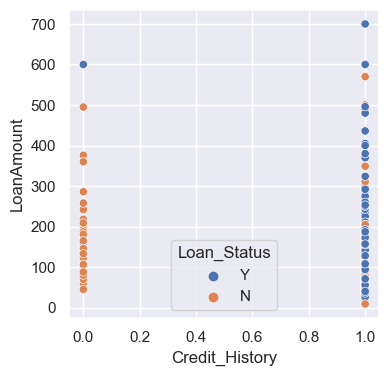

The description of Credit History feature : 
 count   564.00
mean      0.84
std       0.36
min       0.00
25%       1.00
50%       1.00
75%       1.00
max       1.00
Name: Credit_History, dtype: float64
The description of Loan Amount Term feature : 
 count   592.00
mean    146.41
std      85.59
min       9.00
25%     100.00
50%     128.00
75%     168.00
max     700.00
Name: LoanAmount, dtype: float64


In [263]:
#Bivariate analysis of Credit History and Loan Amount Term
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, x='Credit_History', y='LoanAmount', hue = 'Loan_Status')
plt.show()
print("The description of Credit History feature : \n",df['Credit_History'].describe())
print("The description of Loan Amount Term feature : \n", df['LoanAmount'].describe())

### Bivariate Analysis : Gender and Married

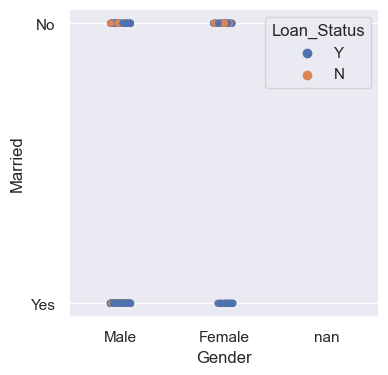

Married    No   Yes
Gender             
Female  72.07 27.93
Male    26.69 73.31


In [264]:
#Analysing gender and married status together
plt.figure(figsize=(4,4))
sns.stripplot(data = df, x = 'Gender', y = 'Married', hue = 'Loan_Status')
plt.show()
#To confirm the insights
freq_table = pd.crosstab(df['Gender'], df['Married'], normalize='index')*100
print(freq_table)

### Bivariate Analysis : Gender and Dependents

Dependents     0     1     2   3+
Gender                           
Female     73.39 17.43  6.42 2.75
Male       54.09 17.19 19.29 9.43


d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


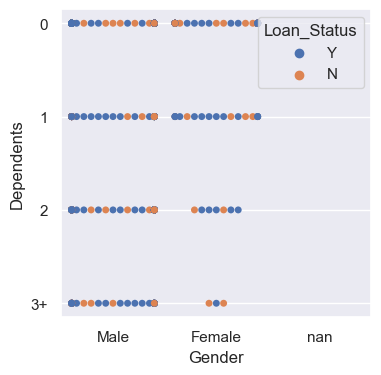

In [265]:
#Analyse Gender and Dependents
plt.figure(figsize=(4,4))
print(pd.crosstab(df['Gender'],df['Dependents'], normalize='index')*100)
sns.swarmplot(data=df, x = 'Gender', y = 'Dependents', hue = 'Loan_Status')
plt.show()

### Bivariate analysis : Education and Self-Employed

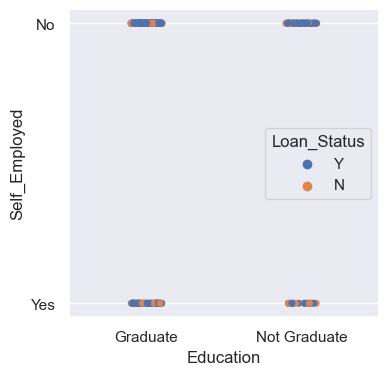

Self_Employed    No   Yes
Education                
Graduate      85.68 14.32
Not Graduate  86.72 13.28


In [266]:
#Analysing 'Education' and 'Self-Employed' features
plt.figure(figsize=(4,4))
sns.stripplot(data=df, x = 'Education', y = 'Self_Employed', hue = 'Loan_Status')
plt.show()

print(pd.crosstab(df['Education'], df['Self_Employed'], normalize='index')*100)

### Bivariate Analysis : Marriage Status , Loan Amount

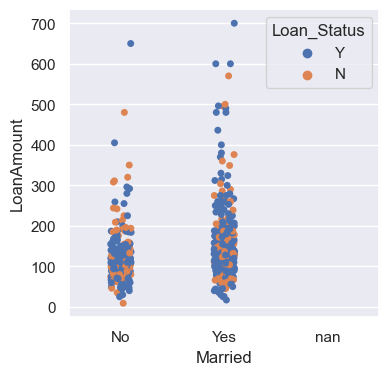

In [267]:
#Analysing 'Married' and 'Loan Amount' features
plt.figure(figsize=(4,4))
sns.stripplot(data=df, x = 'Married', y = 'LoanAmount', hue = 'Loan_Status')
plt.show()

## Insights : 
* Loan Amount tends to be more for a applicants with greater income
* No significant influence of income of co-applicant on loan status
* No discernable relation between loan amount and loan term
* People with good credit history tend to apply for larger loans
* Married males tend to usually apply for home loans.
    * Females, in general, tend to apply less for hoam loans.
    * Even less are awareded home loans
* Females are less likely to have 2,3 or more dependents. Those of them who do apply for loans have very slim chances of having their home loans approved.
* Contrary to common thinking, marital status and loan amount have no discernable relation.

## Data Cleaning : 
In the data cleaning and preprocessing steps, we clean the data and make it suitable for further processing.
With this objective, we'll be doing the following : 
* Dealing with missing values using imputers
* Dealing with numerical variables:
    * Remove the outliers
    * Scaling the data
    * Normalizing the data
* Dealing with categorical variables
* Since there are no spelling errors, we can skip the step.

### Dealing with Missing values

In [268]:
#First, we inspect the data again.
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [269]:
#We will now drop the 'Loan_ID' column as it is does not provide any insight into the loan status
df.drop('Loan_ID', axis=1, inplace=True)
#Also, since the 'Loan_Status' is our target variable, we will store it in a separate variable
y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban
1,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban
4,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban


In [270]:
#Now, we first check for missing values in the dataset
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [271]:
#To deal with missing values, we first have to spearate the numerical versus the categorical data
#This is because we need to apply different imputer strategies for numerical and categorical data 
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

# df[cat_cols].head()
df[num_cols].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.00,NaN,360.00,1.00
1,4583,1508.00,128.00,360.00,1.00
2,3000,0.00,66.00,360.00,1.00
3,2583,2358.00,120.00,360.00,1.00
4,6000,0.00,141.00,360.00,1.00


In [272]:
#We first import the imputers
from sklearn.impute import SimpleImputer

#Creating imputer objects
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')

#Selecting the cols for the respective imputers

df_cat = df[cat_cols]
df_num = df[num_cols]

df_cat = pd.DataFrame(cat_imputer.fit_transform(df_cat))
df_num = pd.DataFrame(num_imputer.fit_transform(df_num))

#Cross-checking to make sure that the values are imputed
# print(df_cat.isnull().sum())
# print(df_num.isnull().sum())
# print(df_cat.head(10))
# print(df_num.head(10))

#Joining the two dataframes
new_df = pd.concat([df_cat, df_num], axis=1)
#Renaming the features
new_df.columns = ['Gender', 'Married',	'Dependents','Education','Self_Employed','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,Graduate,No,Urban,5849.00,0.00,146.41,360.00,1.00
1,Male,Yes,1,Graduate,No,Rural,4583.00,1508.00,128.00,360.00,1.00
2,Male,Yes,0,Graduate,Yes,Urban,3000.00,0.00,66.00,360.00,1.00
3,Male,Yes,0,Not Graduate,No,Urban,2583.00,2358.00,120.00,360.00,1.00
4,Male,No,0,Graduate,No,Urban,6000.00,0.00,141.00,360.00,1.00


### Dealing with Numerical data

#### Dealing with Outliers

<Figure size 1800x1200 with 0 Axes>

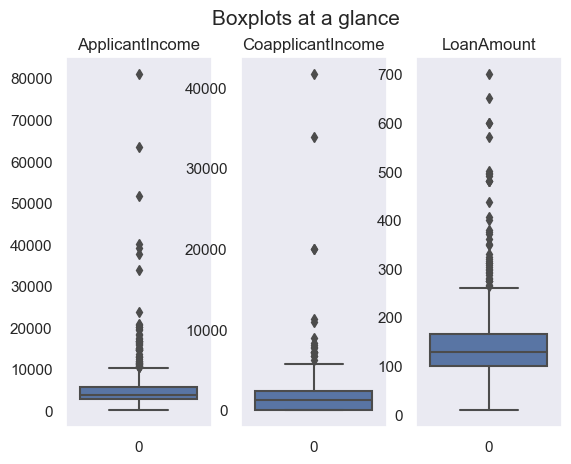

In [273]:
#We will now deal with outliers in the group
#To figure out the outliers, we will make a boxplot
plt.figure(figsize=(18,12))
sns.set_theme(style='dark')

figure, ax = plt.subplots(nrows=1, ncols=3)
figure.suptitle('Boxplots at a glance', fontsize=15)

# Fixing the while loop condition
counter=0
for i in range(0,3,1):
    sns.boxplot(df_num[df_num.columns[counter]], ax=ax[i])
    ax[i].set_title(num_cols[counter]) 
    counter+=1
plt.show()

<Figure size 1800x1200 with 0 Axes>

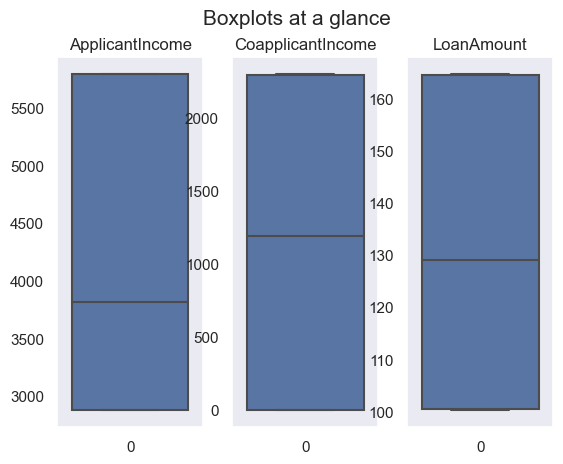

In [274]:
#To deal with outliers in coapplicant income and loan amount, we will use the z-score method
features_with_outliers = ['ApplicantIncome',	'CoapplicantIncome'	,'LoanAmount']
new_df[features_with_outliers].head()

def deal_with_outliers(col):
    lowlim = new_df[col].quantile(0.25)
    uplim = new_df[col].quantile(0.75)
    new_df[col] = [uplim if val>=uplim else val for val in new_df[col]]
    new_df[col] = [lowlim if val<=lowlim else val for val in new_df[col]]

for feat in features_with_outliers:
    deal_with_outliers(feat)

#Plotting to check the removal of outliers
plt.figure(figsize=(18,12))
sns.set_theme(style='dark')
figure, ax = plt.subplots(nrows=1, ncols=3)
figure.suptitle('Boxplots at a glance', fontsize=15)
counter=0
for i in range(0,3,1):
    sns.boxplot(new_df[features_with_outliers[counter]], ax=ax[i])
    ax[i].set_title(features_with_outliers[counter]) 
    counter+=1

#### Scaling and Normalizing

<Figure size 400x400 with 0 Axes>

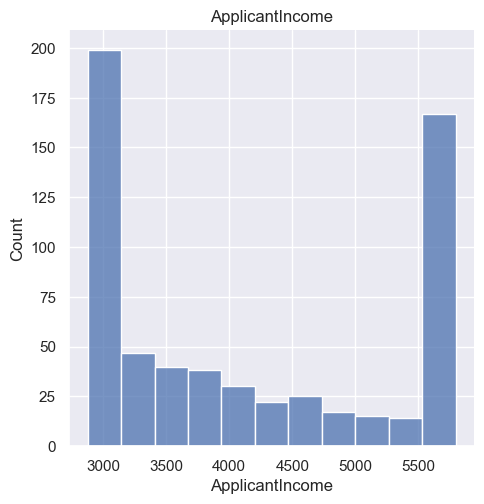

<Figure size 400x400 with 0 Axes>

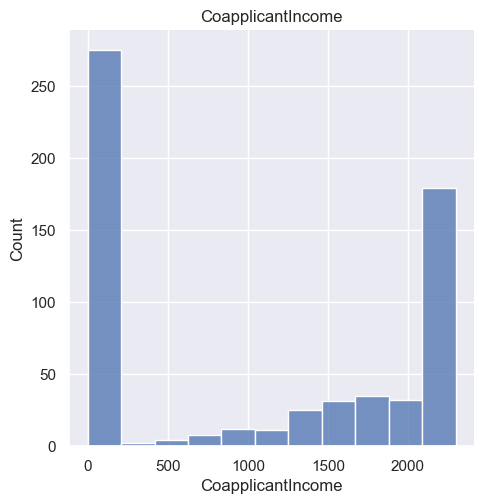

<Figure size 400x400 with 0 Axes>

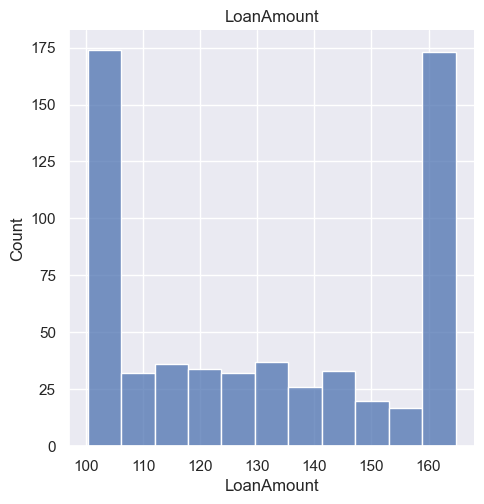

<Figure size 400x400 with 0 Axes>

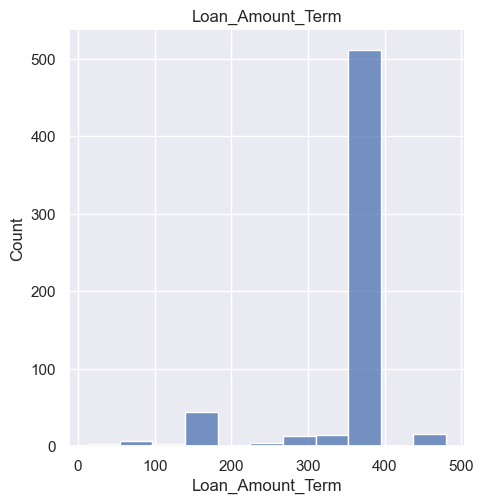

<Figure size 400x400 with 0 Axes>

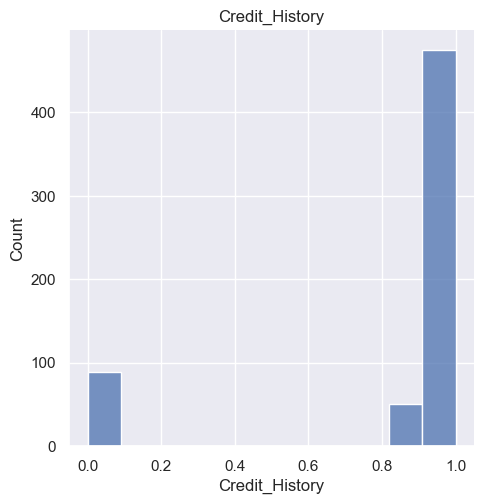

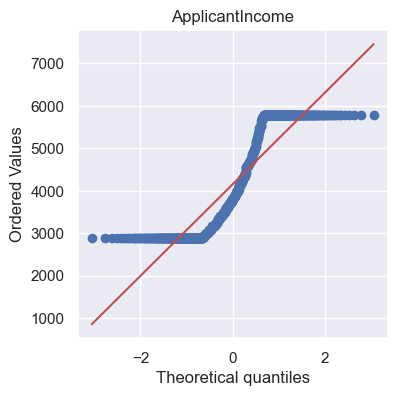

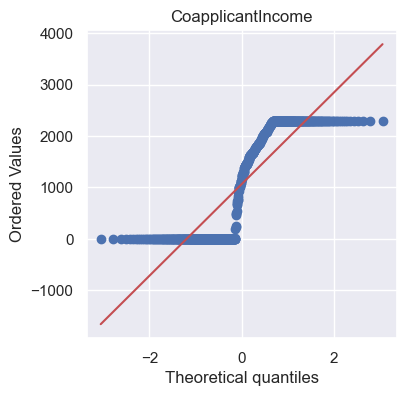

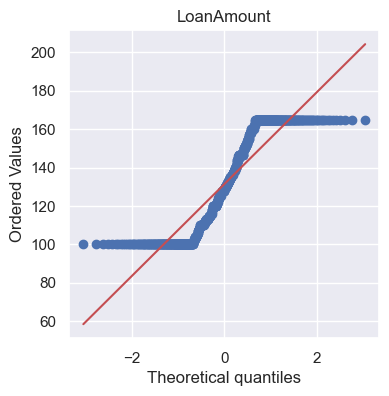

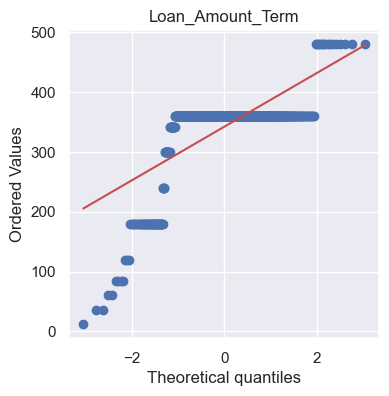

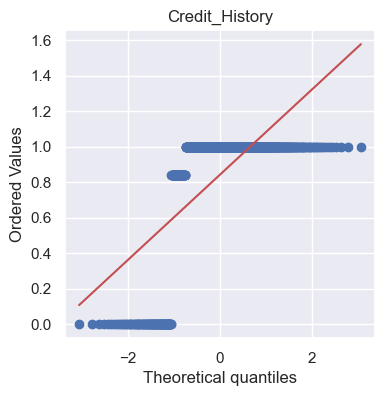

In [275]:
#For normalization, we use the PowerTransform class
#Since it already standardizes the data, we have no extra need of a StandardScaler
import scipy.stats as stats

#We first plot the features that require a power transformation
def plotting_dist(datafr):
    for col in num_cols:
        sns.set_theme(style='darkgrid')
        plt.figure(figsize=(4,4))
        sns.displot(data=datafr[col])
        plt.title(col)

        # plt.subplot(122)
        # stats.probplot(new_df[col], dist='norm', plot=plt)
    for col in num_cols:
        sns.set_theme(style='darkgrid')
        plt.figure(figsize=(4,4))
        stats.probplot(x=datafr[col], dist='norm', plot=plt)
        plt.title(col)

        plt.show()

plotting_dist(new_df)


<Figure size 400x400 with 0 Axes>

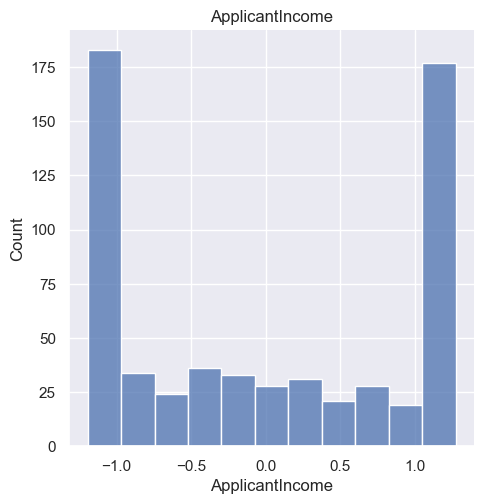

<Figure size 400x400 with 0 Axes>

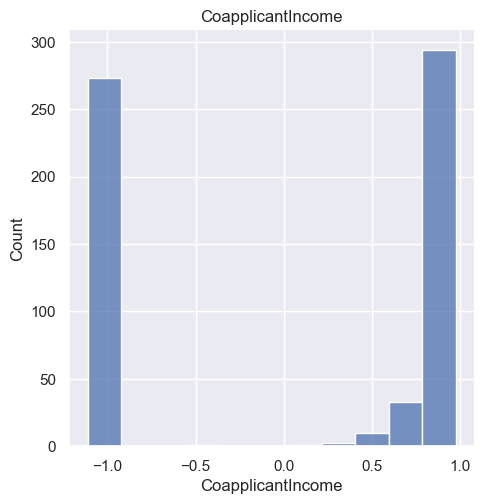

<Figure size 400x400 with 0 Axes>

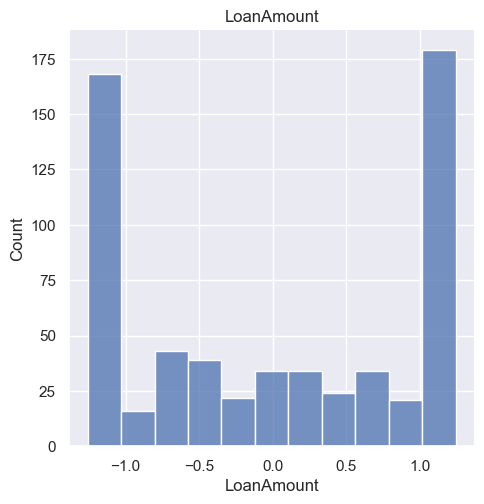

<Figure size 400x400 with 0 Axes>

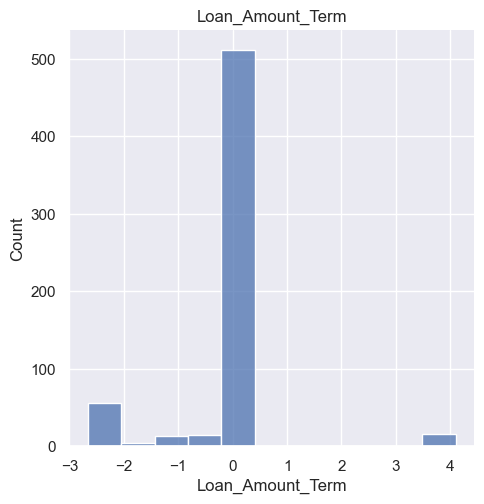

<Figure size 400x400 with 0 Axes>

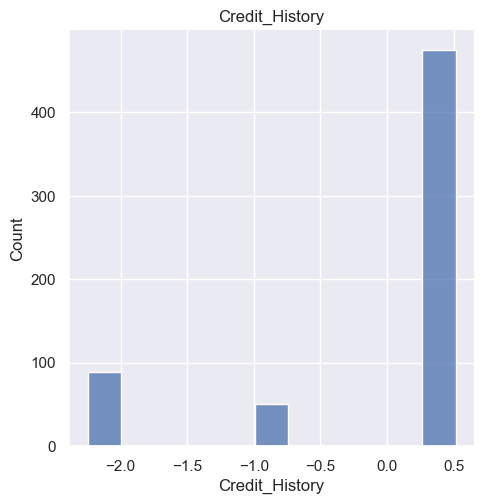

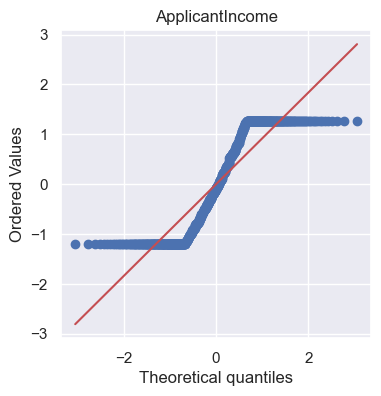

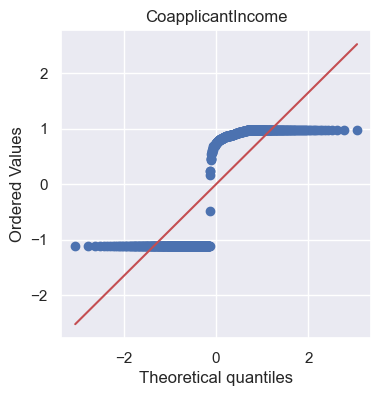

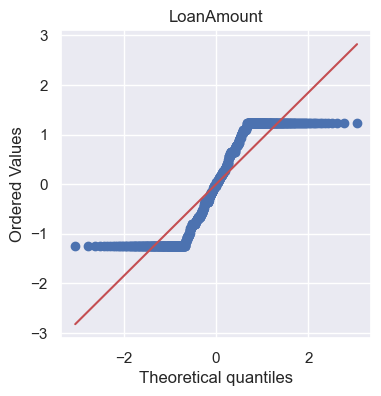

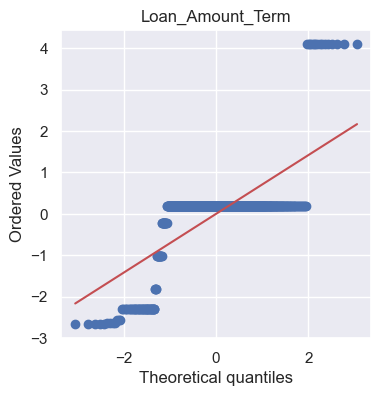

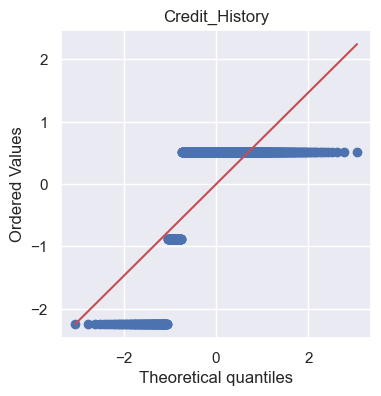

In [276]:
#Now to apply the transformation
from sklearn.preprocessing import PowerTransformer

yj = PowerTransformer(method='yeo-johnson')
new_nums = pd.DataFrame(yj.fit_transform(new_df[num_cols]))

new_nums.columns = num_cols
plotting_dist(new_nums)

#Since the data was very skewed, we werent able to produce as much influence over the distribution

#### Dealing with categorical variables

In [277]:
#Now, we will now deal with categorical variables
#For that purpose, we will make dummies using the get_dummies() function offered by pandas
new_df_cat = pd.get_dummies(data=new_df[cat_cols])
new_df_cat.head()
#we will also need to modify the target feature
# y = pd.get_dummies(y)
# y.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


## Feature Engineering:
* We will now be analyzing the relationship between different features and the target variable in order choose suitable features for training our model.
* We will also attempt to derive better features that can also share a close relation to the target variable


In [278]:
#Since we are now solely focusing on finding suitable features for the ML model, it is better to use coined terms

X = new_df.drop(cat_cols, axis=1)
X = pd.concat([X, new_df_cat], axis=1)

#From the above gained insights, I summed the most suitable features
suitable_feat = ['Gender_Male', 'Dependents_0', 'Dependents_1', 'Education_Graduate']
X['Sum_suitable'] = X[suitable_feat].sum(axis=1)

In [279]:
loan_status = [1 if val=='Y' else 0 for val in y.loc[:]]
loan_status = pd.DataFrame(loan_status, index=y.index)
loan_status.head()


,0
0,1
1,0
2,1
3,1
4,1


In [280]:
#Renaming the column
loan_status.columns = ['LoanStatus']

#We can also add some more features to aid the model
X['TotalIncome'] = X['ApplicantIncome']+X['CoapplicantIncome']
X['EMI'] = X['LoanAmount']*30/X['Loan_Amount_Term']
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Sum_suitable,TotalIncome,EMI
0,5795.00,0.00,146.41,360.00,1.00,0,1,1,0,1,...,1,0,1,0,0,0,1,3,5795.00,12.20
1,4583.00,1508.00,128.00,360.00,1.00,0,1,0,1,0,...,1,0,1,0,1,0,0,3,6091.00,10.67
2,3000.00,0.00,100.25,360.00,1.00,0,1,0,1,1,...,1,0,0,1,0,0,1,3,3000.00,8.35
3,2877.50,2297.25,120.00,360.00,1.00,0,1,0,1,1,...,0,1,1,0,0,0,1,2,5174.75,10.00
4,5795.00,0.00,141.00,360.00,1.00,0,1,1,0,1,...,1,0,1,0,0,0,1,3,5795.00,11.75


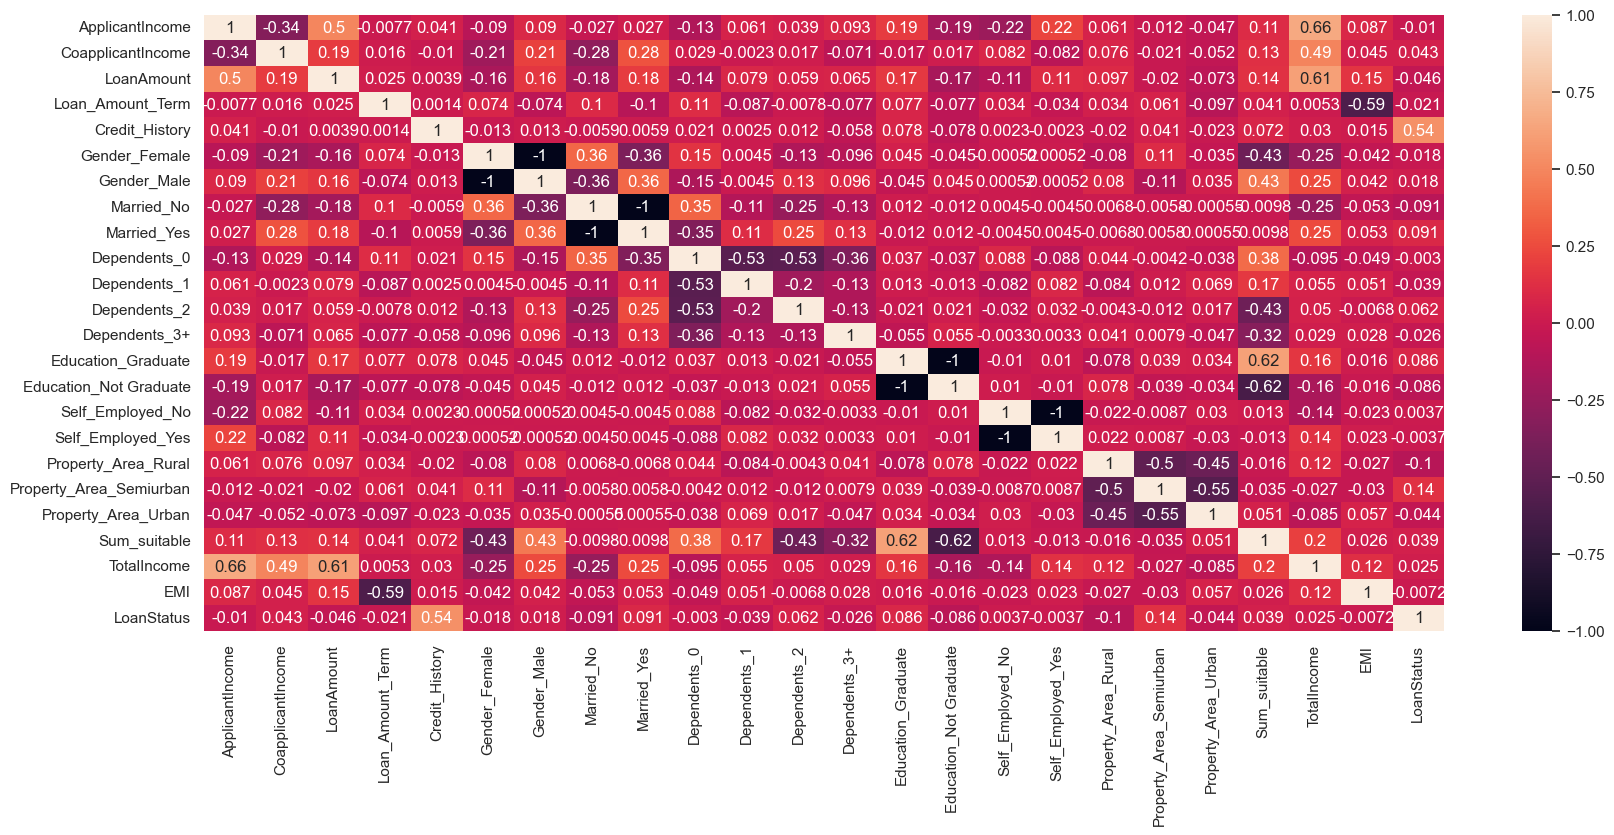

In [281]:
#Lets draw one more heatmap to now analyze the relations between categorical variables too

plt.figure(figsize=(20,8))
sns.heatmap(data=X.join(loan_status).corr(),annot=True)
plt.show()

In [286]:
## Now that we are finally done, we can begin with training the model. Before we do that, we add some finishing touches
X.head()
y = loan_status
y.head()

,LoanStatus
0,1
1,0
2,1
3,1
4,1


## Training the model

To train and test the efficiency of various models, there exists a library called LazyPredict that will show the summary of after all the ML models have been applied

In [287]:
#Before we do that, we need to split our data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [292]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000, n_jobs=4,random_state=0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))


d:\Anaconda\anafiles\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.321243900742115
